In [1]:
import numpy as np
import pandas as pd
from lathes_model_multiclass import LathesModel, Lathes_train_test_split

import matplotlib.pyplot as plt

In [2]:
%%time

input_id = 0
INPUT_PATH = 'Input/Input_%i.csv' %input_id

data = pd.read_csv(INPUT_PATH, header=None).values

data.shape

CPU times: user 2.85 s, sys: 154 ms, total: 3.01 s
Wall time: 3 s


(2813440, 9)

In [3]:
X = data[:,:-1]
y = data[:,-1]

X_train, X_test, yy_train, yy_test = Lathes_train_test_split(X, y, test_size=0.3, random_state=12)

print('X_train shape:', X_train.shape)
print('y_train shape:', yy_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', yy_test.shape)

X_train shape: (1967616, 8)
y_train shape: (1967616,)
X_test shape: (845824, 8)
y_test shape: (845824,)


In [4]:
params = {'N_PCs':4,
          'granularity':4, 
          'n_jobs':4,
          'selection_type':'intersection'}

model = LathesModel(**params)

In [5]:
model.selection_type_

'intersection'

In [6]:
X_norm = model._normalization(X_train,yy_train)

In [7]:
# X_extracted = model._tsfresh_extraction(X_norm)
X_extracted = pd.read_csv('X_extracted.csv', index_col=[0])

In [8]:
model._tsfresh_selection_3class(X_extracted)


In [9]:
model._pca()

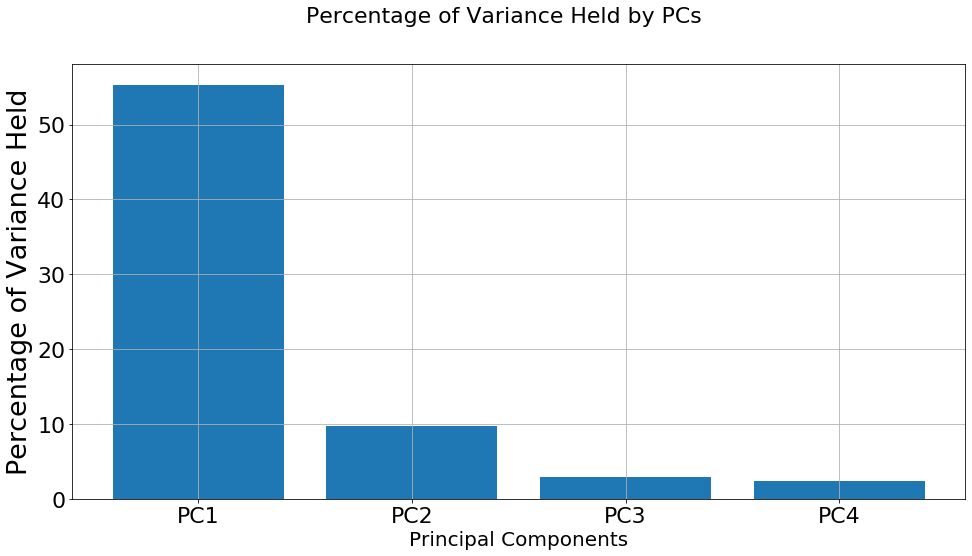

In [10]:
model.plot_variation_held(show=True)

In [11]:
%%time 

model._soda()


Executing Data Partition...
[--------------------------------------------------] 100.00% - 5 of 5  cloud_member_recruitment_njit_njitCPU times: user 7.74 s, sys: 35 ms, total: 7.77 s
Wall time: 7.77 s


In [12]:
model._grouping_algorithm()

In [13]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [14]:
classifiers = [KNeighborsClassifier(3),
        SVC(gamma='scale'),
        SVC(gamma=2, C=1),
        GaussianProcessClassifier(1.0 * RBF(1.0)),
        DecisionTreeClassifier(),
        RandomForestClassifier(n_estimators=100),
        MLPClassifier(alpha=1,max_iter=500),
        AdaBoostClassifier(),
        GaussianNB(),
        QuadraticDiscriminantAnalysis()]

names = ["Nearest Neighbors", 
         "Linear SVM", 
         "Radial-basis function kernel SVM", 
         "Radial-basis function kernel Gaussian Process",
         "Decision Tree", 
         "Random Forest", 
         "MLP Neural Network", 
         "AdaBoost",
         "Gaussian Naive Bayes", 
         "Quadratic Discriminant Analysis"]

In [15]:
for clf_name, clf in zip(names, classifiers):
    clf.fit(model.X_projected_, model.target_)

/home/matheus/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [16]:
from sklearn.metrics import balanced_accuracy_score, plot_confusion_matrix

from datetime import datetime

In [17]:
%%time
model.change_hyperparams({'n_jobs': 0})

tac = datetime.now()

X_test_norm = model._predict_normalization(X_test)

model._predict_tsfresh_extraction(X_test_norm)

model._predict_pca()

tic = datetime.now()

Feature Extraction: 100%|██████████| 236/236 [01:33<00:00,  2.53it/s]


CPU times: user 23min 12s, sys: 10.3 s, total: 23min 22s
Wall time: 8min 16s


Nearest Neighbors - 90.13881613410163


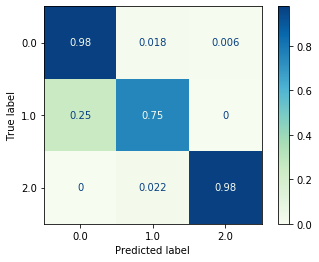

Linear SVM - 48.55072463768116


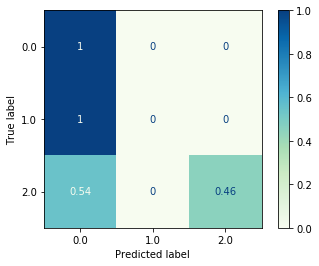

Radial-basis function kernel SVM - 69.66780164134802


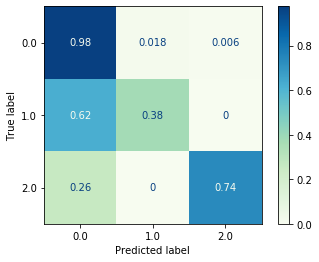

Radial-basis function kernel Gaussian Process - 91.99115301786858


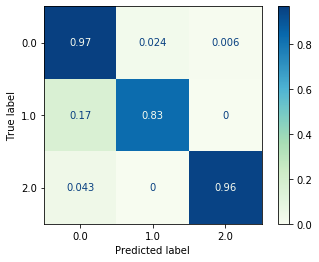

Decision Tree - 82.47118910424305


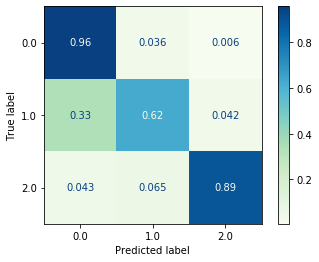

Random Forest - 86.8990454571911


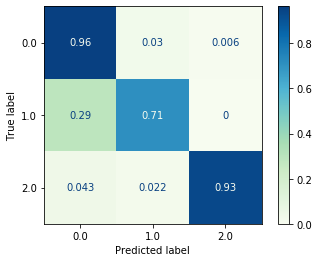

MLP Neural Network - 88.22609277690474


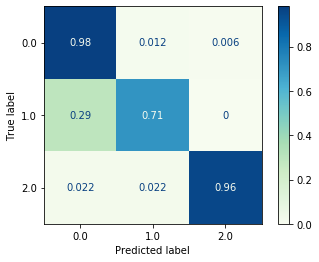

AdaBoost - 84.92084279145567


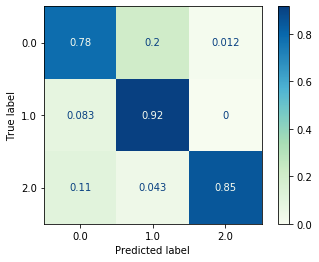

Gaussian Naive Bayes - 65.65392002793784


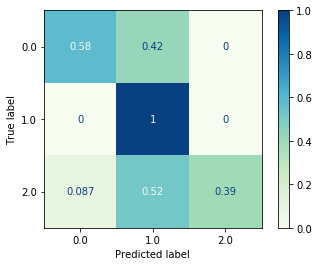

Quadratic Discriminant Analysis - 67.19050113497468


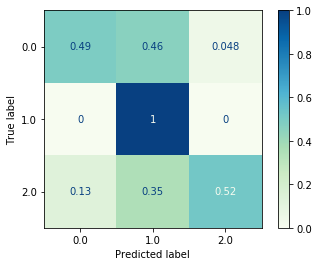

In [18]:
y_test = yy_test[::3584]

Classifiers_result = {}

for clf_name, clf in zip(names, classifiers):
    clf_tac = datetime.now()
    
    Classifiers_result[clf_name] = {}
    
    y_pred = clf.predict(model.X_test_projected_)
    acc = balanced_accuracy_score(y_test,y_pred)*100
    Classifiers_result[clf_name]['Accuracy'] = acc
    
    print(clf_name, '-', acc)
    plot_confusion_matrix(clf, model.X_test_projected_, y_test, 
                          cmap='GnBu', normalize='true')
    plt.show()
    
    f = plt.figure(figsize=(10,7))
    ax = f.subplots(1,1)
    plot_confusion_matrix(clf, model.X_test_projected_, y_test, 
                            cmap='GnBu', normalize='true', ax=ax)
    plt.title('{} - {:.2f}%'.format(clf_name, acc))
    plt.close()
    
    clf_tic = datetime.now()
    Classifiers_result[clf_name]['Time'] = ((tic - tac) + (clf_tic - clf_tac))

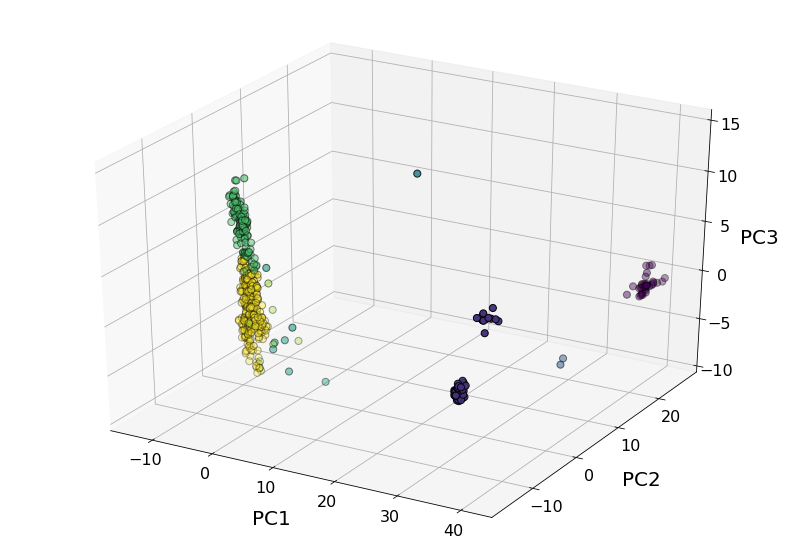

In [19]:
model.plot_soda(show=True)

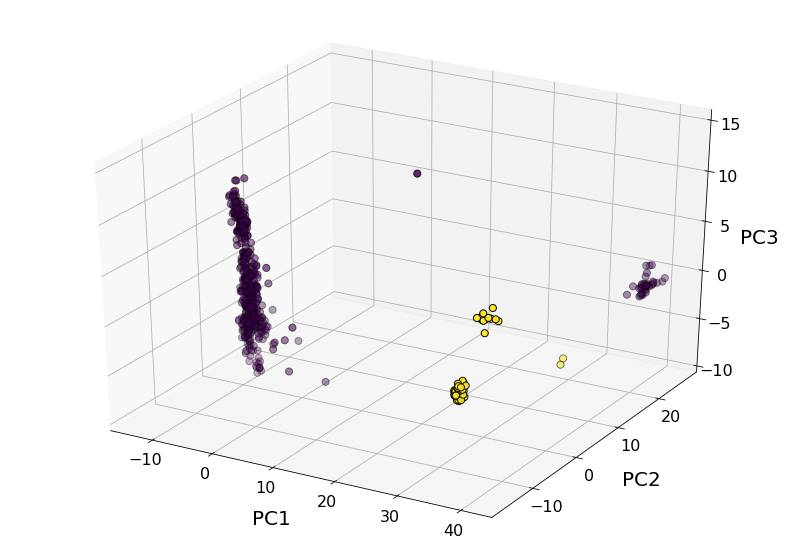

In [20]:
model.plot_GA(show=True)

In [21]:
np.unique(model.classifiers_label_)

array([0., 2.])

In [22]:
np.unique(model.target_)

array([0., 1., 2.])

In [23]:
results = pd.DataFrame(Classifiers_result).T

results

,Accuracy,Time
Nearest Neighbors,90.1388,00:08:16.355205
Linear SVM,48.5507,00:08:16.387448
Radial-basis function kernel SVM,69.6678,00:08:16.284094
Radial-basis function kernel Gaussian Process,91.9912,00:08:16.371630
Decision Tree,82.4712,00:08:16.309674
Random Forest,86.899,00:08:16.340455
MLP Neural Network,88.2261,00:08:16.308114
AdaBoost,84.9208,00:08:16.342112
Gaussian Naive Bayes,65.6539,00:08:16.296467
Quadratic Discriminant Analysis,67.1905,00:08:16.305379


In [24]:
def plot(PATH=False, figsize=[14,10], s=50, label_fontsize=20,
                    label_pad=18, ticks_fontsize=16, cmap='viridis', show=False):

                x = model.X_projected_[:,0]
                y = model.X_projected_[:,1]
                z = model.X_projected_[:,2]
                                    
                fig = plt.figure(figsize=figsize)
                ax = fig.add_subplot(111, projection='3d')

                colors = model.target_
                ax.scatter(x, y, z, c=colors, s=s, edgecolor='k', cmap=cmap)
                    
                plt.ylabel('PC2',fontsize=label_fontsize,labelpad=label_pad)
                plt.xlabel('PC1',fontsize=label_fontsize, labelpad=label_pad)
                ax.set_zlabel('PC3', fontsize=label_fontsize, labelpad=int(2/3*label_pad))
                plt.tick_params(axis='x', labelsize=ticks_fontsize)
                plt.tick_params(axis='y', labelsize=ticks_fontsize)
                plt.tick_params(axis='z', labelsize=ticks_fontsize)
                ax.grid()
                if show:
                    plt.show()
                if PATH:
                    fig.savefig(PATH, bbox_inches='tight')


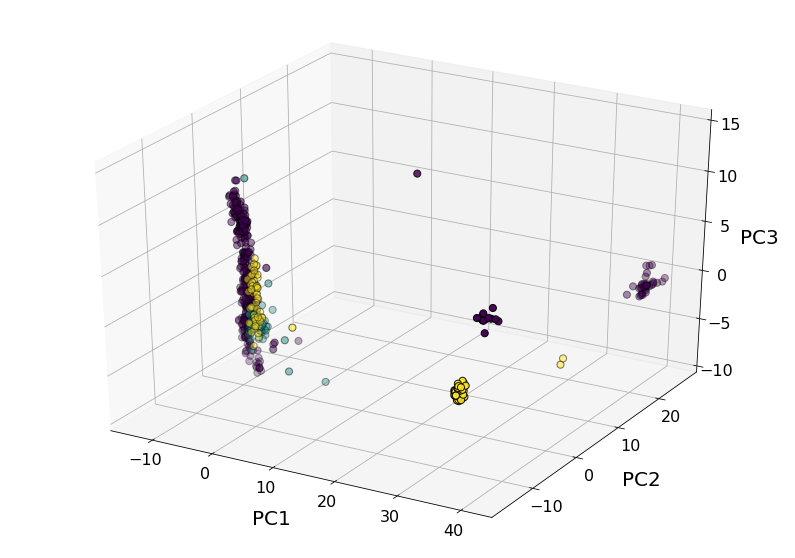

In [25]:
plot()

(array([386.,  56., 107.]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <a list of 3 Patch objects>)

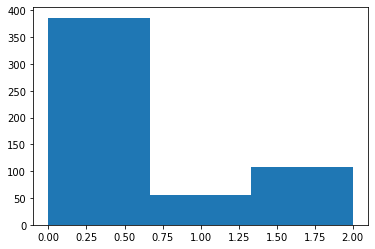

In [26]:
plt.hist(model.target_, bins=3)

In [27]:
386/549

0.7030965391621129

In [28]:
56/549

0.10200364298724955

In [29]:
107/549

0.19489981785063754

In [30]:
model.selection_type_

'intersection'